In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Information about the columns:
    Rounds - Amount of rounds player played.
    ACS - is an abbreviation of "Average Combat Score." 
    ACS defines a player's overall performance which includes kills, assists, deaths, ability usage, first blood, damage, economic awareness and much more.
    K/D - Kill / Death ratio
    ADR - an Average Damage per Round
    KPR - an Average Kills per Round
    DPR - an Average Deaths per Round
    APR - an Average Assists per Round
    FBPR - an Average First Bloods per Round
    FDPR - an Average First Deaths per Round
    HS% - Headshot Percentage (Amount of your shots landed to the head)
    FBSR - First Blood Success Rate

## We will try to answer the following questions about the data:
    1. What's the distribution of players around the World?
    2. Find the average of each metric for future analysis
    3. What is the correlation between metrics?
    4. At what metric each country is good at?
    5. Who's top 10 performers based on both raing and KDR?
    6. Does HS% and KDR relation follow linear regression?
    7.



In [4]:
#First we need to import our data
df = pd.read_csv('valorant_stats.csv', sep=',')

In [9]:
df.isnull().sum()
#Since we have a clean data right right away we can start our analysis

Player     0
Country    0
Rounds     0
Rating     0
ACS        0
K/D        0
ADR        0
KPR        0
DPR        0
APR        0
FBPR       0
FDPR       0
HS%        0
FBSR       0
dtype: int64

## 1.What is the destribution of players around the world?

<AxesSubplot:xlabel='Country'>

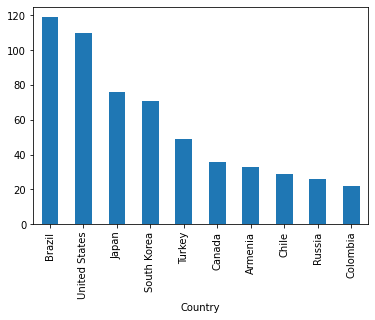

In [64]:
player_by_country = df.groupby(['Country'])['Player'].count().sort_values(ascending=False).head(10)
player_by_country
#Since there too many countries showing all of the countries would mess our space, so lets show the top 10
player_by_country.plot.bar()


